<a href="https://colab.research.google.com/github/dfdavila/AI6/blob/master/ML_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887 

%load_ext autoreload
%autoreload 2

%matplotlib inline

%reload_ext autoreload

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

  Cloning https://github.com/fastai/fastai (to revision 2e1ccb58121dc648751e2109fc0fbf6925aa8887) to /tmp/pip-req-build-prhmzcg8
  Running command git clone -q https://github.com/fastai/fastai /tmp/pip-req-build-prhmzcg8
  Running command git checkout -q 2e1ccb58121dc648751e2109fc0fbf6925aa8887
  Stored in directory: /tmp/pip-ephem-wheel-cache-thv_ynpp/wheels/25/e9/9b/223e47f59c39f0bd393733db0f7efe8ec6f078d29c32198f9f
Successfully built fastai


In [3]:
# Connect Google Colab to Google Drive
from google.colab import drive

# By running this codeline we have to give authorization to the account
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls gdrive/'My Drive'/'Lesson 1'

 DL_Lesson_1.ipynb     'ML Lesson 1.ipynb'   Train.csv
 Machine_Appendix.csv   Test.csv


In [0]:
PATH = "/content/gdrive/My Drive/Lesson 1/"
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=["saledate"])

In [0]:
add_datepart(df_raw, 'saledate')    #The add_datepart function creates new columns, each one with a part of the original field 'Date'
train_cats(df_raw)
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand = df_raw.UsageBand.cat.codes
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')
import feather
df_raw = feather.read_dataframe('tmp/bulldozers-raw')


**Preparing the data** 

In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

def split_vals(a,n):  #Creamos nuestro set de validación
  return a[:n], a[n:]

n_valid = 12000

n_trn = len(df_trn)-n_valid

X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

raw_train, raw_valid = split_vals(df_raw, n_trn)

In [0]:
#Create the function to work with RMSLE

def rmse(x,y): 
  return math.sqrt(((x-y)**2).mean())            #Define the function that calculates RMSE

def print_score(m):                                           #definimos una función para que imprima rmse y score de entrenamiento y validación
    res = ["--rmse train: ", rmse(m.predict(X_train), y_train),  "--rmse valid: ",rmse(m.predict(X_valid), y_valid),
                "--m.score train:", m.score(X_train, y_train), "--m.score valid: ", m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): 
      res.append ("obb_score: ")
      res.append(m.oob_score_)
    print(res)
    
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [11]:
df_raw        #Reviewing the data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,310,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Arizona,BL,Backhoe Loaders,Four Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Powershuttle,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008,12,51,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,790,E,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2004,8,35,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,416,D,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Illinois,BL,Backhoe Loa



**Training the Random Forest**

We regenerate the Random Forest using the techniques we've seen so far

A subset of the data is used as trining data: X_train, y_train

In [12]:
set_rf_samples(50000)    #subsampling

m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

m.fit(X_train, y_train)

print_score(m)

['--rmse train: ', 0.21491824320376135, '--rmse valid: ', 0.25792676066096454, '--m.score train:', 0.9034657582110638, '--m.score valid: ', 0.881193341415196, 'obb_score: ', 0.8846470014083668]


In [13]:
#Analizing the standard deviation
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 423 ms, sys: 28 ms, total: 451 ms
Wall time: 450 ms


(9.225561269161883, 0.22903700297836863)

In [14]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 50.7 ms, sys: 162 ms, total: 213 ms
Wall time: 567 ms


(9.225561269161883, 0.22903700297836863)

In [15]:
df_raw.Enclosure.cat.categories


Index(['EROPS', 'EROPS AC', 'EROPS w AC', 'NO ROPS', 'None or Unspecified',
       'OROPS'],
      dtype='object')

# Analyzubg the Enclosure column

In [17]:
X_valid.Enclosure.describe (include='all')

count    12000.000000
mean         3.676417
std          2.081283
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          6.000000
Name: Enclosure, dtype: float64

In [16]:
X_valid.Enclosure.value_counts()

6    4913
3    3777
1    3308
0       2
Name: Enclosure, dtype: int64

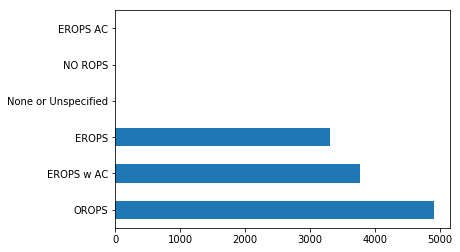

In [18]:
x = raw_valid.copy()                         # volvemos a usar los datos originales sin procesamiento
x['pred_std'] = np.std(preds, axis=0)        # añadimos una columna con std de los pronósticos       
x['pred'] = np.mean(preds, axis=0)           # añadimos una columna con mean de los pronósticos
x.Enclosure.value_counts().plot.barh();      # graficamos los valores en la columna Enclosure

#Viendo el gráfico podemos decidir descartar las tres primeras categorías.

**Standard Deviation**

In [21]:
x.Enclosure.value_counts()                  #Same data from the graph

OROPS                  4913
EROPS w AC             3777
EROPS                  3308
None or Unspecified       0
NO ROPS                   0
EROPS AC                  0
Name: Enclosure, dtype: int64

In [22]:
#Creating a new dataframe 'flds', only qith the data that we want to analyze
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

#Te real sale price and the prediction values are almost similar in three categories: ‘EROPS’, ‘EROPS w AC’, ‘OROPS’ (the rest has nule values).
#Since these nule columns does not add any additional information we will delete them.
#Then, we visualize the plots for sale price and its predicttion

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.842180,0.255086
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.583805,0.245645
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.687484,0.214965


In [23]:
isinstance (enc_summ, pd.DataFrame)    # enc_summ is another dataframe

True

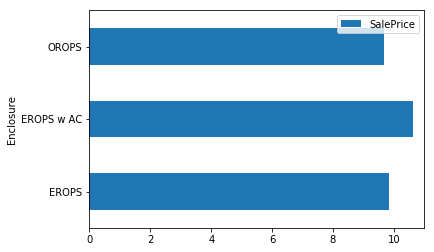

In [24]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

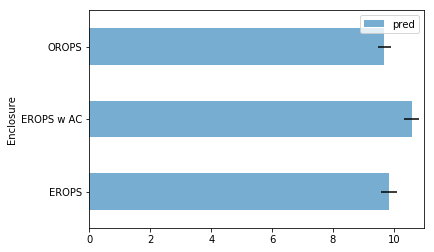

In [25]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

In [0]:
#Add to the analysis the diference between the real sale price and the predicted sale price

x['diferencia'] = ((x.SalePrice-x.pred)/x.SalePrice)*100 

In [27]:
#Create a new dataframe 'flds', only with the data to analyse
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std','diferencia']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std,diferencia
0,EROPS,9.849178,9.842180,0.255086,-0.021729
1,EROPS AC,NaN,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.583805,0.245645,0.312347
3,NO ROPS,NaN,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN,NaN
5,OROPS,9.682064,9.687484,0.214965,-0.137657


**Analizyng the  ProductSize variable**

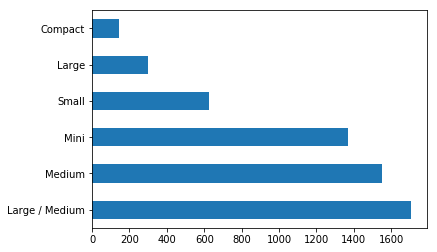

In [29]:
raw_valid.ProductSize.value_counts().plot.barh();

In [30]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.857843,0.353746
Large,10.470589,10.387173,0.359238
Large / Medium,10.691871,10.656766,0.283488
Medium,10.681511,10.637021,0.268944
Mini,9.535147,9.561659,0.220410
Small,10.324448,10.315950,0.295311


In [31]:
#We take a proportion of the standard deviation values and the sum of the preditions to compare which category has the highest deviation

(summ.pred_std/summ.pred).sort_values(ascending=False) 

ProductSize
Compact           0.035885
Large             0.034585
Small             0.028627
Large / Medium    0.026602
Medium            0.025284
Mini              0.023051
dtype: float64

In [32]:
(enc_summ.pred_std/enc_summ.pred).sort_values(ascending=False)

0    0.025918
2    0.023209
5    0.022190
1         NaN
3         NaN
4         NaN
dtype: float64

In [33]:
enc_summ.sort_values(by=['pred'])

,Enclosure,SalePrice,pred,pred_std,diferencia
5,OROPS,9.682064,9.687484,0.214965,-0.137657
0,EROPS,9.849178,9.842180,0.255086,-0.021729
2,EROPS w AC,10.623971,10.583805,0.245645,0.312347
1,EROPS AC,NaN,NaN,NaN,NaN
3,NO ROPS,NaN,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN,NaN


In [34]:
raw_valid.Enclosure.value_counts()

OROPS                  4913
EROPS w AC             3777
EROPS                  3308
None or Unspecified       0
NO ROPS                   0
EROPS AC                  0
Name: Enclosure, dtype: int64

**Importance of the  parameters**

>

In [35]:
m.feature_importances_

array([0.02676, 0.01411, 0.0588 , 0.00098, 0.00364, 0.17573, 0.00216, 0.00091, 0.03876, 0.01745, 0.04409,
       0.00373, 0.0215 , 0.09949, 0.06961, 0.00664, 0.01122, 0.01147, 0.0115 , 0.03369, 0.00032, 0.0004 ,
       0.00024, 0.00038, 0.00096, 0.00003, 0.00009, 0.00031, 0.00014, 0.00222, 0.00115, 0.00465, 0.00275,
       0.00021, 0.0008 , 0.01293, 0.00185, 0.14495, 0.02018, 0.03276, 0.00836, 0.00124, 0.00498, 0.00071,
       0.00033, 0.00023, 0.00018, 0.00323, 0.00306, 0.00012, 0.00022, 0.0225 , 0.00252, 0.0047 , 0.00661,
       0.00328, 0.00618, 0.00008, 0.00003, 0.00002, 0.00001, 0.     , 0.     , 0.0501 , 0.00021, 0.00154])

In [36]:
nombreColumnas=X_train.columns.values

for i in range(len(nombreColumnas)):
    print (f'Columna {i:3} {nombreColumnas[i]:35} -> {m.feature_importances_[i]:f}')
    
  

Columna   0 SalesID                             -> 0.026760
Columna   1 MachineID                           -> 0.014111
Columna   2 ModelID                             -> 0.058803
Columna   3 datasource                          -> 0.000984
Columna   4 auctioneerID                        -> 0.003636
Columna   5 YearMade                            -> 0.175727
Columna   6 MachineHoursCurrentMeter            -> 0.002159
Columna   7 UsageBand                           -> 0.000913
Columna   8 fiModelDesc                         -> 0.038758
Columna   9 fiBaseModel                         -> 0.017449
Columna  10 fiSecondaryDesc                     -> 0.044087
Columna  11 fiModelSeries                       -> 0.003727
Columna  12 fiModelDescriptor                   -> 0.021500
Columna  13 ProductSize                         -> 0.099494
Columna  14 fiProductClassDesc                  -> 0.069611
Columna  15 state                               -> 0.006639
Columna  16 ProductGroup                

In [37]:
fi = rf_feat_importance(m, df_trn)       
fi[:10] #Shows the 10 most important variables

,cols,imp
5,YearMade,0.175727
37,Coupler_System,0.144948
13,ProductSize,0.099494
14,fiProductClassDesc,0.069611
2,ModelID,0.058803
63,saleElapsed,0.050095
10,fiSecondaryDesc,0.044087
8,fiModelDesc,0.038758
19,Enclosure,0.033689
39,Hydraulics_Flow,0.032757


In [39]:
fi[len(fi)-10:]    #Shows the 10 least important variables

,cols,imp
28,Enclosure_Type,0.000141
49,Differential_Type,0.000124
26,Blade_Extension,0.000087
57,saleIs_month_end,0.000076
25,Turbocharged,0.000033
58,saleIs_month_start,0.000032
59,saleIs_quarter_end,0.000022
60,saleIs_quarter_start,0.000012
61,saleIs_year_end,0.000000
62,saleIs_year_start,0.000000


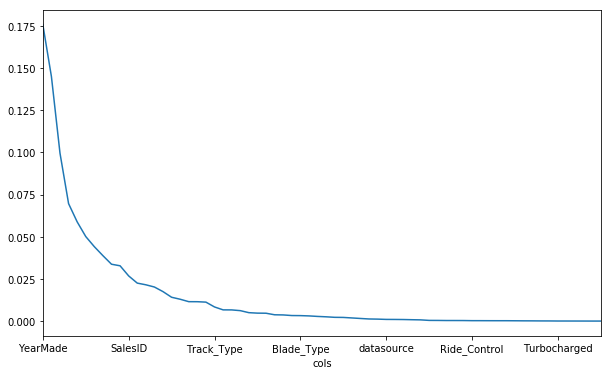

In [40]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

**Plot of the parameter's importance**

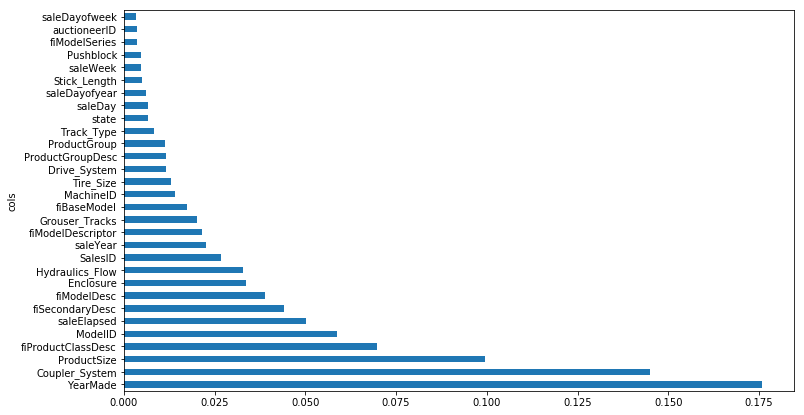

In [42]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

#Here's a bar diagram of the 30 main features

In [43]:
to_keep = fi[fi.imp>0.005].cols            #We keep only the values > 0.005
len(to_keep)

24

**Deleting the least important parameters from the analysis**

In [0]:
df_keep = df_trn[to_keep].copy() #Creating a tree only with the main atributes
X_train, X_valid = split_vals(df_keep, n_trn)

In [45]:
nombreColumnas=X_train.columns.values

for i in range(len(nombreColumnas)):
    print (f'Columna {i:3} {nombreColumnas[i]:35} -> {m.feature_importances_[i]:f}')

Columna   0 YearMade                            -> 0.026760
Columna   1 Coupler_System                      -> 0.014111
Columna   2 ProductSize                         -> 0.058803
Columna   3 fiProductClassDesc                  -> 0.000984
Columna   4 ModelID                             -> 0.003636
Columna   5 saleElapsed                         -> 0.175727
Columna   6 fiSecondaryDesc                     -> 0.002159
Columna   7 fiModelDesc                         -> 0.000913
Columna   8 Enclosure                           -> 0.038758
Columna   9 Hydraulics_Flow                     -> 0.017449
Columna  10 SalesID                             -> 0.044087
Columna  11 saleYear                            -> 0.003727
Columna  12 fiModelDescriptor                   -> 0.021500
Columna  13 Grouser_Tracks                      -> 0.099494
Columna  14 fiBaseModel                         -> 0.069611
Columna  15 MachineID                           -> 0.006639
Columna  16 Tire_Size                   

In [46]:
#Adjusting the new data to the model

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
 n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

['--rmse train: ', 0.2067368030213643, '--rmse valid: ', 0.24382823258340672, '--m.score train:', 0.9106755361342872, '--m.score valid: ', 0.893826543713229, 'obb_score: ', 0.8943887080221536]


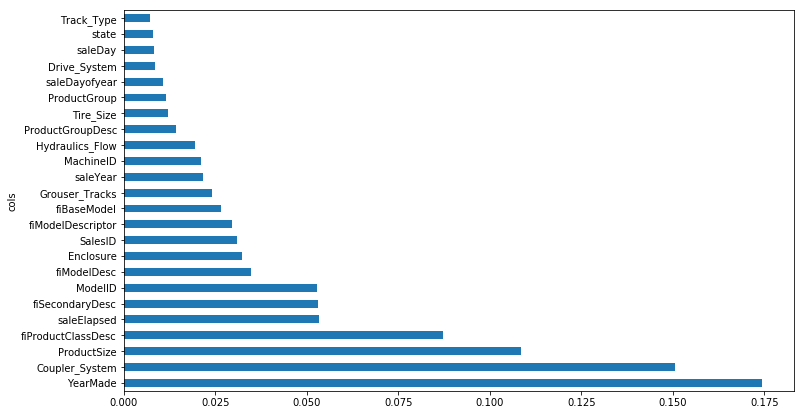

In [47]:
#Reviewing the importance of the feature again to verify our hypothesis
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);


# Checking the importance of a parameter

If we modify the data of a column, keeping the other parameters constant, we are seeing what impact a parameter has on the total prediction.

You could replace all the data by a value or change the order of them.

In [0]:
from sklearn.utils import shuffle

In [0]:
def print_score_shuffle(m):              #Defining a function to print the rmse and score of training and validation (testing)
    res = ["--m.score valid: ", m.score(X_shuffle, y_shuffle)]
    print(res)

In [0]:
def shuffle_columna(dfAux, varAux):        #Creating a copy of the dataframe 'dfAux', with the 'varAux' in random order
  n=dfAux.columns.get_loc(varCol)
  dfextra = pd.DataFrame(shuffle(dfAux[varAux].tolist()))
  dfextra.index=dfAux.index.tolist()
  dfAux2 = dfAux.drop ([dfAux.columns[n]],axis=1)
  dfAux2.insert(loc=n, column=varAux, value=dfextra)
  return dfAux2

In [52]:
X_shuffle = X_valid
y_shuffle = y_valid
print_score_shuffle(m)

['--m.score valid: ', 0.893826543713229]


In [53]:
varCol = 'YearMade'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.5737746681979596]


In [54]:
varCol = 'Enclosure'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.8572661230254073]


In [55]:
varCol = 'state'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.8933977576428367]


In [56]:
varCol = 'ProductSize'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.6207486265927078]


In [57]:
varCol = 'fiProductClassDesc'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.7502168693916624]


In [0]:
AQUI TERMINA LA LECCION NUM 3

In [0]:
L 4 empieza aquiiii

**Codificación One-Hot**

In [0]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

['--rmse train: ', 0.20753709277980184, '--rmse valid: ', 0.25394744409431336, '--m.score train:', 0.9099826375824779, '--m.score valid: ', 0.8848309813443944, 'obb_score: ', 0.8922138198574618]


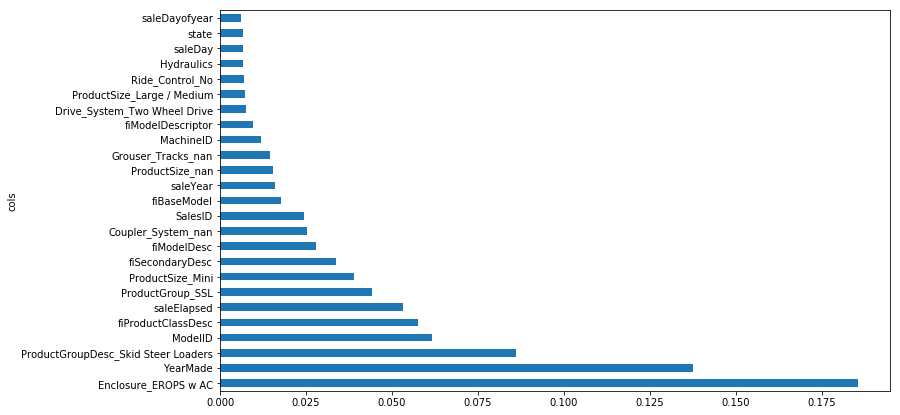

In [0]:
fi = rf_feat_importance(m, df_trn2)                   # en fi guardamos las columnas con su valor de importancia
plot_fi(fi[:25]);                                     # graficamos las 25 más importantes

**Eliminar redundancia de información**

In [0]:
#Vamos a buscar las columnas que tienen un alto grado de correlación.
#Se va a utilizar la función hierarchy de la libreria scipy.cluster

from scipy.cluster import hierarchy as hc 

In [0]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)


In [0]:
df_keep.shape             #Es la matriz con la que estamos trabajando, tiene menos columnas que las 66 columnas iniciales

(401125, 24)

In [0]:
corr.shape                #Es la matriz de correlación

(24, 24)

In [0]:
print ("Matriz de correlacion \n\n")
for i in range (0,corr.shape[0]):
  for j in range (0,corr.shape[1]):
    print (f'{corr[i,j]:+f} ', end = " ")
  print ("")
   

Matriz de correlacion 


+1.000000  +0.186700  -0.147100  -0.025200  +0.512200  +0.095500  +0.131300  +0.187000  -0.076400  +0.133600  +0.230100  +0.221900  -0.081900  +0.185100  +0.512200  -0.038100  -0.131000  +0.063100  +0.018000  -0.046200  +0.015400  -0.042200  +0.072400  +0.089100  
+0.186700  +1.000000  +0.082200  -0.310900  +0.081100  +0.249500  -0.282600  +0.998100  -0.021500  +0.314200  +0.085400  -0.160500  -0.021700  +0.998200  +0.080400  +0.039300  -0.226900  -0.171700  +0.004100  -0.013700  +0.015400  -0.203900  -0.172300  -0.198700  
-0.147100  +0.082200  +1.000000  +0.102600  -0.034300  +0.008500  +0.069200  +0.082100  +0.329600  +0.077400  +0.009400  -0.012400  +0.329700  +0.081900  -0.033400  -0.038100  +0.869100  -0.686400  -0.008400  -0.033300  -0.016800  -0.633600  -0.688100  -0.350000  
-0.025200  -0.310900  +0.102600  +1.000000  +0.011700  -0.022200  -0.093100  -0.310500  +0.256600  -0.433800  +0.032700  +0.224700  +0.256300  -0.310600  +0.012400  -0.058300  +0.4

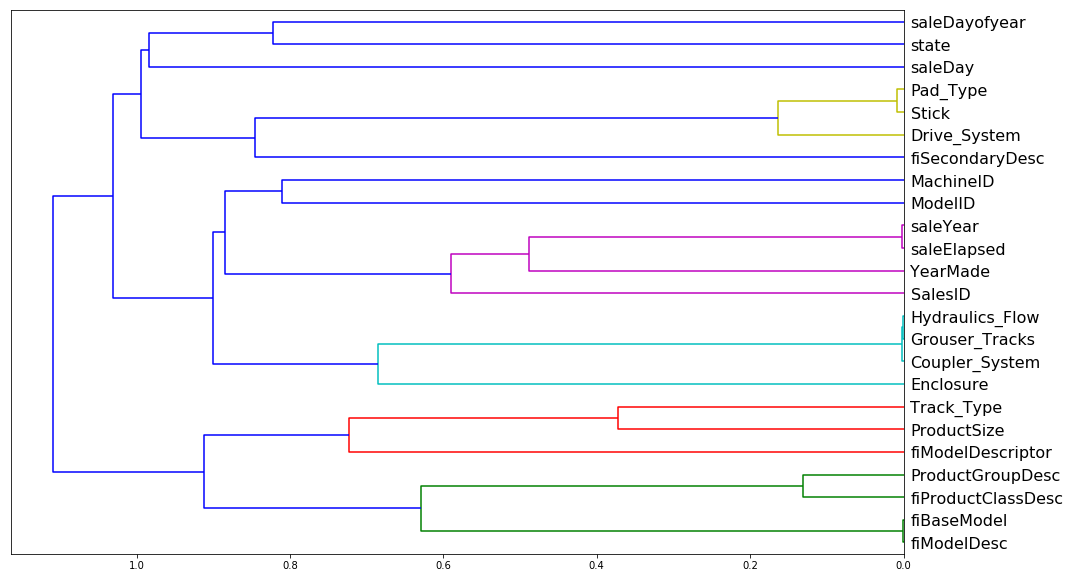

In [0]:
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [0]:
nombreColumnas=df_keep.columns.values

for i in range(len(nombreColumnas)):
    print (f'Columna {i:3} {nombreColumnas[i]:35}')

Columna   0 YearMade                           
Columna   1 Coupler_System                     
Columna   2 fiProductClassDesc                 
Columna   3 ProductSize                        
Columna   4 saleElapsed                        
Columna   5 ModelID                            
Columna   6 fiSecondaryDesc                    
Columna   7 Grouser_Tracks                     
Columna   8 fiModelDesc                        
Columna   9 Enclosure                          
Columna  10 SalesID                            
Columna  11 fiModelDescriptor                  
Columna  12 fiBaseModel                        
Columna  13 Hydraulics_Flow                    
Columna  14 saleYear                           
Columna  15 MachineID                          
Columna  16 ProductGroupDesc                   
Columna  17 Stick                              
Columna  18 saleDay                            
Columna  19 state                              
Columna  20 saleDayofyear               

In [0]:
corr[4,:]                 # la columna 4 tiene alta correlacion
                          # con otras columnas, vamos a analizarla

array([ 0.5122,  0.0811, -0.0343,  0.0117,  1.    ,  0.0726,  0.1736,  0.0811,  0.0005,  0.0439,  0.5012,
        0.1743, -0.0044,  0.0785,  0.9976,  0.0934, -0.0368, -0.0239,  0.0317, -0.0382,  0.0435, -0.0406,
       -0.0148,  0.0569])

In [0]:
print ("Correlacion de :", nombreColumnas[4],"con: ",  nombreColumnas[1], " =" , corr[4,1], "con: ", nombreColumnas[12], corr[4,12])

Correlacion de : saleElapsed con:  Coupler_System  = 0.0811 con:  fiBaseModel -0.0044


In [0]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [0]:
#A continuación se muestra el puntaje original de OOB antes de eliminar cualquier función

get_oob(df_keep)                     #Esta es nuestra linea base

0.8905935337049576

In [0]:
# este lazo utiliza la funcion get_obb para calcular la precision de un random forest eliminando uno a uno los parametros

for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(f'obb score si se elimina {c:15} = {get_oob(df_keep.drop(c, axis=1)):f}')

obb score si se elimina saleYear        = 0.889547
obb score si se elimina saleElapsed     = 0.887023
obb score si se elimina fiModelDesc     = 0.888298
obb score si se elimina fiBaseModel     = 0.889254
obb score si se elimina Grouser_Tracks  = 0.889978
obb score si se elimina Coupler_System  = 0.890039


In [0]:
#Descartamos 1 elemento de cada grupo y volvemos a generar el modelo

to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.8885775583373943

In [0]:
#Pruebo eliminando otro elemento del grupo que analizamos
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks', 'Hydraulics_Flow']
get_oob(df_keep.drop(to_drop, axis=1))

0.889196475839028

In [0]:
#Desde aqui utilizaremos este modelo

df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

KeyError: ignored

In [0]:
reset_rf_samples()

In [0]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

['--rmse train: ', 0.1252169195979833, '--rmse valid: ', 0.22715363170570815, '--m.score train:', 0.9672311758715851, '--m.score valid: ', 0.9078516966558324, 'obb_score: ', 0.9085789646674052]


# Eliminar dependencias parciales

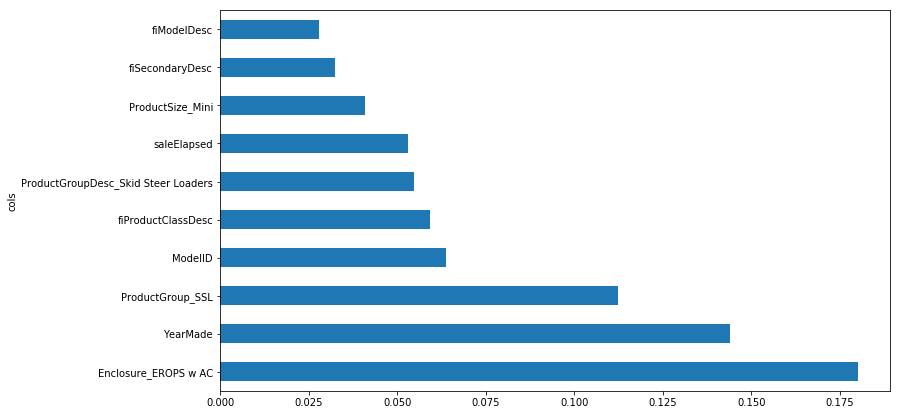

In [0]:
from pdpbox import pdp
from plotnine import *

set_rf_samples(50000)

df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

plot_fi(rf_feat_importance(m, df_trn2)[:10]);

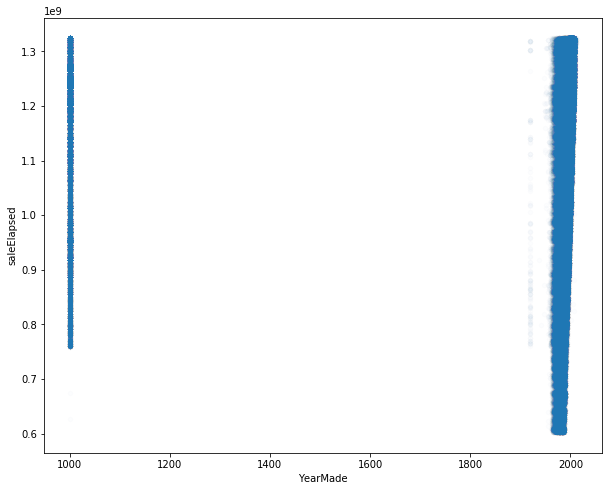

In [0]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [0]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

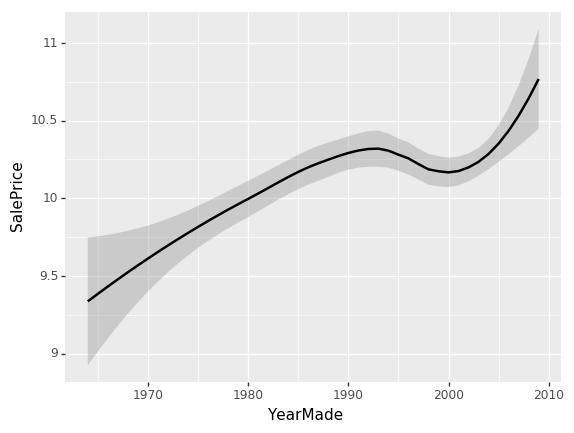

<ggplot: (-9223363286433410851)>

In [0]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f55ce884978>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f55d90f1be0>})

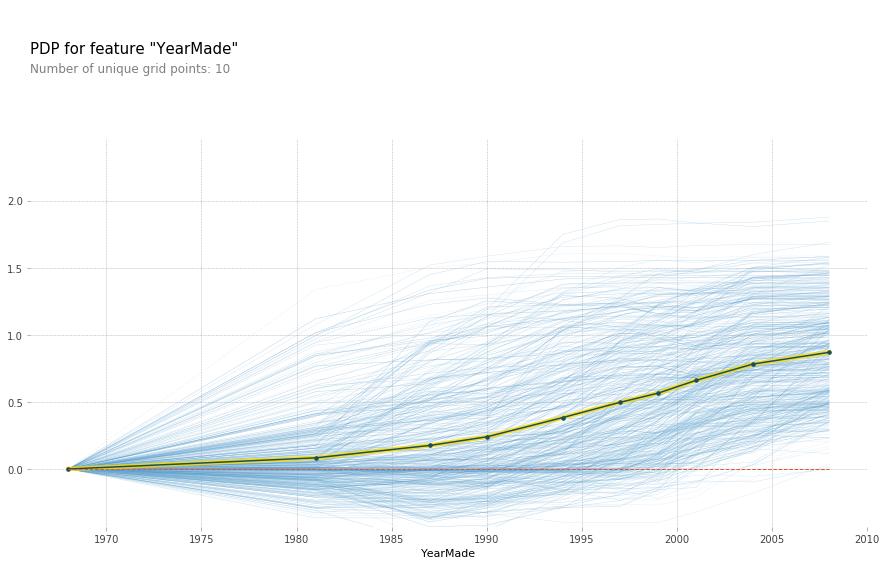

In [0]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)
plot_pdp ('YearMade')

Esto confirma nuestra hipótesis de que el precio de venta aumenta para los vehículos fabricados más recientemente.

Ahora podemos hacer un análisis de cluster, para ver los cinco más comunes comportamientos que tenemos.

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f55d8df7f98>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f55d8e42fd0>})

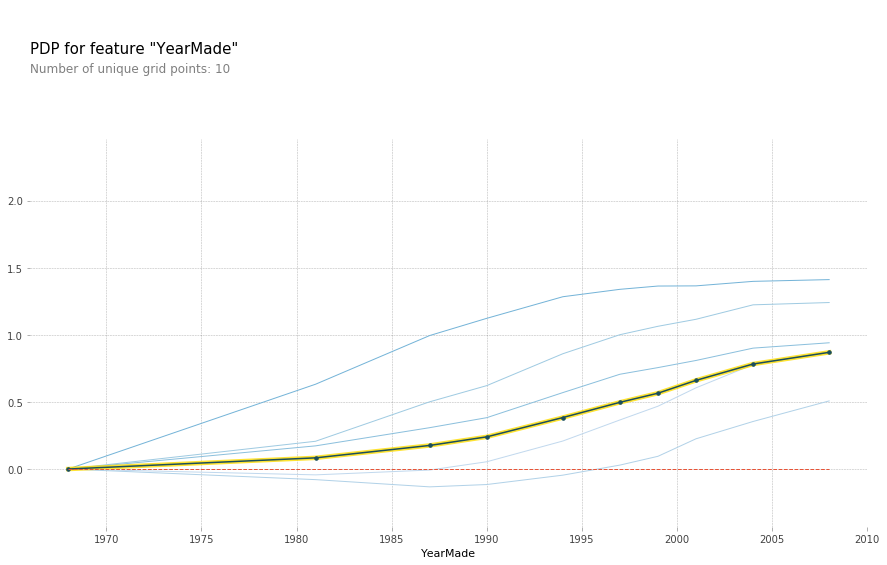

In [0]:
plot_pdp('YearMade', clusters=5)

Podemos hacer lo mismo en un gráfico de dependencia parcial (PDP Interaction Plot). Lo que deseamos ver es como saleElapsed y YearMade juntas impactan al precio


In [0]:
## Line added to draw pdp_interact properly
!sed -i ‘251s/.* / inter_ax.clabel(c2, /g’ /usr/local/lib/python3.6/dist-packages/pdpbox/pdp_plot_utils.py

feats = ['saleElapse', 'YearMade']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `sed -i ‘251s/.* / inter_ax.clabel(c2, /g’ /usr/local/lib/python3.6/dist-packages/pdpbox/pdp_plot_utils.py'


ValueError: ignored

In [0]:
plot_pdp([‘Enclosure_EROPS w AC’, ‘Enclosure_EROPS’, ‘Enclosure_OROPS’], 5, ‘Enclosure’)

SyntaxError: ignored

In [0]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep[‘age’] = df_raw[‘age’] = df_raw.saleYear-df_raw.YearMade

X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

SyntaxError: ignored

**Intérprete de árboles**

In [0]:
#Importemos la biblioteca del intérprete de árbol y evaluemos los resultados de la primera fila en el conjunto de validación.

from treeinterpreter import treeinterpreter as ti

df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

row = X_valid.values[None,0]; row

array([[4364751, 2300944, 665, 172, 1.0, 1999, 3726.0, 2, 3232, 1111, 0, 63, 0, 17, 35, 0, 12, 0, 19, 29, 0,
        2010, 9, 37, 16, 3, 259, False, False, False, False, False, False, 1284595200, False, False, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]],
      dtype=object)

In [0]:
prediction[0], bias[0]

(9.1909688098736275, 10.10606580677884)

NameError: ignored